In [1]:
import pandas as pd

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
0    99.827251
1     0.172749
Name: Class, dtype: float64


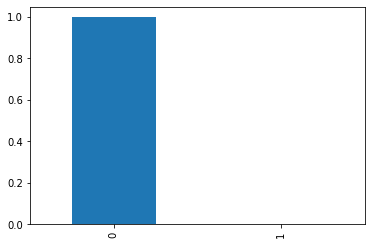

In [2]:
from google.colab import drive
drive.mount('/content/drive')
df = pd.read_csv('/content/drive/MyDrive/4-2/capstone2/creditcard.csv')
df.Class.value_counts(normalize=True).plot(kind='bar')
print(df.Class.value_counts(normalize=True)*100)

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import *
X = df.iloc[:,:-1]
y = df.iloc[:,-1]
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25,random_state=10)
#모델링
def modeling(model,x_train,x_test,y_train,y_test):
    model.fit(x_train,y_train)
    pred = model.predict(x_test)
    metrics(y_test,pred)
#평가 지표
def metrics(y_test,pred):
    accuracy = accuracy_score(y_test,pred)
    precision = precision_score(y_test,pred)
    recall = recall_score(y_test,pred)
    f1 = f1_score(y_test,pred)
    roc_score = roc_auc_score(y_test,pred,average='macro')
    print('정확도 : {0:.6f}, 정밀도 : {1:.6f}, 재현율 : {2:.6f}'.format(accuracy,precision,recall))
    print('f1-score : {0:.6f}, auc : {1:.6f}'.format(f1,roc_score,recall))

In [4]:
from lightgbm import LGBMClassifier
lgb = LGBMClassifier(n_estimators=1000,num_leaves=64,n_jobs=-1,boost_from_average=False)
modeling(lgb,X_train,X_test,y_train,y_test)

정확도 : 0.999635, 정밀도 : 0.952381, 재현율 : 0.826446
f1-score : 0.884956, auc : 0.913188


In [6]:
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(max_iter=10000)
sm = SMOTE(random_state=42)
X_res, y_res = sm.fit_resample(X, y)
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res,test_size=0.25,random_state=10)
modeling(lr,X_train,X_test,y_train,y_test)

정확도 : 0.957407, 정밀도 : 0.967014, 재현율 : 0.947107
f1-score : 0.956957, auc : 0.957405


In [10]:
from imblearn.over_sampling import BorderlineSMOTE 
from imblearn.over_sampling import SMOTE 
lr = LogisticRegression(max_iter=10000)
sm = SMOTE(random_state=42)
border_sm = BorderlineSMOTE(sampling_strategy=0.5,random_state=42)
X_border_sm1, y_border_sm1 = border_sm.fit_resample(X, y)
X_border_sm2, y_border_sm2 = sm.fit_resample(X_border_sm1, y_border_sm1)


sm = SMOTE(sampling_strategy=0.5, random_state=42)
X_res, y_res = sm.fit_resample(X, y)
border_sm = BorderlineSMOTE(random_state=42)
X_sm_border, y_sm_border = border_sm.fit_resample(X_res, y_res)

X_train, X_test, y_train, y_test = train_test_split(X_border_sm2, y_border_sm2,test_size=0.25,random_state=10)
print('border_sm')
modeling(lr, X_train,X_test,y_train,y_test)

print('sm_border')
X_train, X_test, y_train, y_test = train_test_split(X_sm_border, y_sm_border,test_size=0.25,random_state=10)
modeling(lr, X_train,X_test,y_train,y_test)

border_sm
정확도 : 0.995238, 정밀도 : 0.993702, 재현율 : 0.996792
f1-score : 0.995244, auc : 0.995238
sm_border
정확도 : 0.963991, 정밀도 : 0.974160, 재현율 : 0.953256
f1-score : 0.963595, auc : 0.963989
